# Data Preprocessing Exercises

Suppose you are assigned to develop a machine learning model to predict whether an individual earns more than USD 50,000 or less in a year using the 1994 US Census Data. The datasets are sourced from the UCI Machine Learning Repository at http://archive.ics.uci.edu/ml/datasets/Census+Income.

The repository provides 5 datasets. However, each dataset is raw and does not come in the form of ABT (Analytic Base Table). The datasets are apparently not ready for predictive modeling.

The objective of this notebook is to guide you through the data preprocessing steps on the raw datasets in a sequence of exercises. The expected outcome is "clean" data that can be directly fed into *any* machine learning algorithm within the Scikit-Learn Python module. The clean data should look like the dataset used in this [case study](https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/) on our website.

## Data Description

The UCI Machine Learning Repository provides five datasets, but only `adult.data`, `adult.test`, and `adult.names` were useful in this project:

* `adult.data` and `adult.test` are the training and test datasets respectively. 
* `adult.names` contains the details of attributes or variables. 

The training dataset has 32,561 training observations. Meanwhile, the test dataset has 16,281 test observations. Both datasets consist of 14 descriptive features and one target feature called `income`. In this exercise, we combine both training and test data into one as part of data preprocessing. The target feature is defined as below.

$$\text{income} = \begin{cases} > 50K & \text{ if the income exceeds USD 50,000} \\ \leq 50K & \text{ otherwise }\end{cases}$$

The descriptive features below are produced from the `adult.names` file: 

* **`age`**: continuous.
* **`workclass`**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **`fnlwgt`**: continuous.
* **`education`**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **`education-num`**: continuous.
* **`marital-status`**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **`occupation`**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-*inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **`relationship`**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **`race`**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **`sex`**: Female, Male.
* **`capital-gain`**: continuous.
* **`capital-loss`**: continuous.
* **`hours-per-week`**: continuous.
* **`native-country`**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US (Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Most of the descriptive features are self-explanatory, except `fnlwgt` which stands for “Final Weight” defined by the US Census. The weight is an “estimate of the number of units in the target population that the responding unit represents”. This feature aims to allocate similar weights to people with similar demographic characteristics.

## Exercises

**Exercise 0**

Read the training and test datasets directly from the data URL's. Also, since the datasets do not contain the feature names, explicitly specify them while loading in the datasets. Once you read in `adultData` and `adultTest` datasets, concatenate them into a single dataset called `df`.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

attributeNames = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]

urls = ("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
       "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test")

adult_data = pd.read_csv(urls[0], sep=",", names=attributeNames, header=None)
adult_test = pd.read_csv(urls[1], sep=",", names=attributeNames, skiprows=1)

In [2]:
df = pd.concat([adult_data, adult_test])

**NOTE:** Sometimes it is good practice to save the concatenated/ stacked data on your local machine as follows:
```Python
df.to_csv('full_income_data.csv', index=False)
df = pd.read_csv('full_income_data.csv')
```

**Exercise 1**

Make sure the feature types match the descriptions outlined in the [Data Description](#Data-Description) section. For example, confirm `age` is a numeric feature.

In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

**Exercise 2**

Calculate the number of missing values for each feature. Does the result surprise you?

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

**Exercise 3**

In Exercise 2, you should see zero missing value for each feature. This indicates some features are coded with different labels such as "?" and "99999", instead of `NaN`. To provide a better overview, generate summary statistics of `df`. **Hint**: Use the `describe()` method with `include=np.number` and `include=np.object`. Make sure you have Python 3.6+ for this to work!

In [5]:
df.describe(include=np.number).round(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000,48842.000,48842.000,48842.000,48842.000,48842.000
mean,38.644,189664.135,10.078,1079.068,87.502,40.422
std,13.711,105604.025,2.571,7452.019,403.005,12.391
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117550.500,9.000,0.000,0.000,40.000
50%,37.000,178144.500,10.000,0.000,0.000,40.000
75%,48.000,237642.000,12.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,4356.000,99.000


In [6]:
df.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


**Exercise 4**

In Exercise 3, you can see the target feature `income` has four unique values. This *contradicts* the definition of `income` as it should have two only labels: "<=50K" and ">50K". In this exercise, return the unique values of `income`.

In [7]:
df['income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

**Exercise 5**

In Exercise 4, you should see `income` consists of 4 unique values. The values are `[' <=50K', ' >50K', ' <=50K.', ' >50K.']`. The value contains excessive white space. In this exercise:

1. Remove the excessive white space of `income` in `df`.
2. Correct the lable of `income` in `df`. In particular, relabel `>50K.` and `<=50K.` to `>50K` and `<=50K` respectively by removing `.`

In [8]:
df['income'] = df['income'].str.strip()
df['income'] = df['income'].str.replace(".", "")
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

**Exercise 6**

In Exercise 5, you can see that the raw (or the pre-cleaned) `income` column contained excessive white spaces. Can other categorical features ('workclass', 'education', 'marital-status', 'relationship',  'occupation', 'race', 'sex','native-country') have the same problem? Check which features have excessive white spaces. Remove the white spaces if necessary.

In [9]:
categorical_cols = ['workclass', 'education', 'marital-status', 'relationship', 
                    'occupation', 'race', 'sex','native-country']

In [10]:
for col in categorical_cols:
    print(f'Before the transformation, the unique values for {col} are:')
    print(df[col].unique())
    print(f'After the transformation, the unique values for {col} are:')
    df[col] = df[col].str.strip()
    print(df[col].unique())
    print('\n')

Before the transformation, the unique values for workclass are:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
After the transformation, the unique values for workclass are:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


Before the transformation, the unique values for education are:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
After the transformation, the unique values for education are:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


Before the transformation, the unique values for marital-status are:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-

Alternatively you can extract the categorical features, excluding `income` into a list:
```Python
categorical_cols = list(df.columns[df.dtypes == object])
categorical_cols = [x for x in categorical_cols if x!='income']
```

**Exercise 7**

The `workclass`, `occupation`, and `native-country` contain some missing values encoded as "?". Check the percentage of "?" in each of `workclass`, `occupation`, and `native-country`.

In [11]:
df['workclass'].value_counts(normalize=True).mul(100).round(3)

Private             69.420
Self-emp-not-inc     7.907
Local-gov            6.421
?                    5.731
State-gov            4.056
Self-emp-inc         3.470
Federal-gov          2.932
Without-pay          0.043
Never-worked         0.020
Name: workclass, dtype: float64

In [12]:
df['occupation'].value_counts(normalize=True).mul(100).round(3)

Prof-specialty       12.637
Craft-repair         12.514
Exec-managerial      12.461
Adm-clerical         11.488
Sales                11.269
Other-service        10.079
Machine-op-inspct     6.187
?                     5.751
Transport-moving      4.822
Handlers-cleaners     4.242
Farming-fishing       3.051
Tech-support          2.961
Protective-serv       2.013
Priv-house-serv       0.495
Armed-Forces          0.031
Name: occupation, dtype: float64

In [13]:
df['native-country'].value_counts(normalize=True).mul(100).round(3)

United-States                 89.742
Mexico                         1.947
?                              1.755
Philippines                    0.604
Germany                        0.422
Puerto-Rico                    0.377
Canada                         0.373
El-Salvador                    0.317
India                          0.309
Cuba                           0.283
England                        0.260
China                          0.250
South                          0.235
Jamaica                        0.217
Italy                          0.215
Dominican-Republic             0.211
Japan                          0.188
Guatemala                      0.180
Poland                         0.178
Vietnam                        0.176
Columbia                       0.174
Haiti                          0.154
Portugal                       0.137
Taiwan                         0.133
Iran                           0.121
Greece                         0.100
Nicaragua                      0.100
P

Alternatively you can calculate the missing percentages as follows:
    
```Python
sum(df['workclass'] == "?")/df.shape[0]*100
sum(df['occupation'] == "?")/df.shape[0]*100
sum(df['native-country'] == "?")/df.shape[0]*100
```

**Exercise 8**

In Exercise 7, you will notice missing values for both of the `workclass` and `occupation` features are about 5.7%. The `native-country` feature contains less than 2% of missing values. Note that the missing data (around more than 90%) are predominantly for the `<=50K` income whereas ~76% of observations pertain to the `<=50K` income at an aggregate level. Therefore, we shall not to impute these missing values but remove them instead as there would be minimal information loss. 

In this exercise, remove the rows where `workclass="?"`, `occupation="?"` and `native-country="?"`. Check that the number of observations reduces from 48,842 to 45,222.

In [14]:
df = df[df['workclass'] != "?"]
df = df[df['occupation'] != "?"]
df = df[df['native-country'] != "?"]
df.shape

(45222, 15)

**Exercise 9**

In Exercise 7, notice that `native-country` is too granular and unbalanced. That is, close to 90% of `native-country` is "United-States" and the remaining 10% is made up of 40 different countries. The granularity (or the large cardinality) would yield a large number of columns when we encode `native-country`. You should also notice `race` exhibits the same problem where `white` accounts more than 75% of instances. In this exercise, 

1. For `native-country`, relabel all other countries as "Other" except "United-States". 
2. Likewise, relabel all other `race` as "Other" except "White".

In [15]:
df.loc[df['native-country'] != "United-States", 'native-country'] = 'Other'
df.loc[df['race'] != "White", 'race'] = 'Other'

**Exercise 10**

Recall that `fnlwgt` stands for "Final Weight" defined by the US Census. The weight is an "estimate of the number of units in the target population that the responding unit represents" This feature aims to allocate similar weights to people with similar demographic characteristics. In short, `fnlwght` has no predictive power. 

In this exercise, remove `fnlwgt` from `df`.

In [16]:
df = df.drop(columns=['fnlwgt'])

Alternatively you can use `inplace=True`:
```Python 
df.drop(columns=['fnlwgt'], inplace=True)

```

**Exercise 11**

We suspect `education` and `education-num` might carry the same information. If they represent the same information, we should remove one of them (why?). To see this, run `len(df['education'].unique())` and `len(df['education-num'].unique())`. Both should give you 16 unique values. To vindicate our suspection, make sure `education` and `education-num` indeed represent the same information. Then, drop `education` from `df`. **Hint**: try `pd.pivot_table`.

In [17]:
len(df['education'].unique()), len(df['education-num'].unique())

(16, 16)

In [18]:
pd.pivot_table(df[['education','education-num']], values='education-num', index='education')

,education-num
education,
10th,6
11th,7
12th,8
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
Assoc-acdm,12
Assoc-voc,11


In [19]:
df = df.drop(columns=['education'])

**Remark**

In the previous exercises, we have performed heaps of data wrangling on target and categorical features. Let's focus on the continuous/numeric features: `age`, `capital-gain`, `capital-loss` and `hours-per-week`. Based on the summary statistics (in Exercise 2), `age` ranges 17 to 90 years old with a mean of 38.64. Therefore, we can conclude `age` has a reasonable range of values and hence requires no data wrangling. However, `hours-per-week` ranges from 1 to 99 hours with a mean of 40. We suspect 99 is used to label the "missing" instance of `hours-per-week`. On the other hand, it is still possible to work more than 90 hours per week. Therefore, we shall not preprocess it further. To check this, you can find the second largest value of `hours-per-week` is 98. Next, `capital-gain` ranges from 0 to 99,999 and we suspect that the missing observations are hence labeled as "99999". Is that true? We run the following code and find that a capital gain value of 99,999 always returns a higher income earner, we conjecture it might be a useful predictive value and hence we shall not remove the observations with this value.
```Python
df.loc[df['capital-gain'] == 99999.000000, 'income'].value_counts()
```

**Exercise 12**

We suspect that `capital-loss =  − capital-gain` because an individual can either pay any capital gain or claim for capital loss to reduce capital gain in future (TaxBracket.org, 2017). Another possibility is to pay neither gain nor loss. Hence, it is more reasonable to record gain or loss as a single variable, rather than having them separate. Before defining such new variable, define a "mask_both" to verify that no observations were recorded as both positive capital-gain and capital-loss values. You should see there is zero count for "True" in the "mask_both". 

In [20]:
mask_both = (df['capital-loss'] >0 ) & (df['capital-gain'] > 0)
mask_both.value_counts()

False    45222
dtype: int64

**Exercise 13**

In light of Exercise 12, define a variable named `capital` which is given as `capital-gain - capital-loss`. Then remove `capital-gain` and `capital-loss` from `df`.


In [21]:
df['capital'] = df['capital-gain'] - df['capital-loss']
df = df.drop(columns=['capital-gain', 'capital-loss'])

In [22]:
df['capital'].describe()

count    45222.000000
mean      1012.834925
std       7530.315380
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital, dtype: float64

**Exercise 14**

As a good practice, the target feature should be the *last column* in the data frame. Move the target feature `income` to the end.

In [23]:
df = df[[c for c in df.columns if c != 'income'] + ['income']]

In [24]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,2174,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,40,United-States,0,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Other,Female,40,Other,0,<=50K


**Exercise 15**

Print the shape of `df` and a list of the columns at this point. Also randomly sample 4 rows with a random state of 11.

In [25]:
print(f'The shape is: {df.shape} \n')
print(f'The columns are: \n{df.columns} \n')

df.sample(n=4, random_state=11)

The shape is: (45222, 12) 

The columns are: 
Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'capital', 'income'],
      dtype='object') 



,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital,income
10179,43,Self-emp-inc,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,70,United-States,0,>50K
16095,45,Private,10,Divorced,Adm-clerical,Not-in-family,White,Female,40,United-States,0,<=50K
2006,57,Private,10,Never-married,Adm-clerical,Other-relative,Other,Female,40,Other,0,<=50K
31231,48,Private,10,Married-civ-spouse,Sales,Husband,Other,Male,40,United-States,0,>50K


**Exercise 16**

Remove the `income` feature from the full dataset and call it `target`. Get a distribution of the values of the target feature (that is, value counts). Name the rest of the features `Data`, which are your descriptive features.

In [26]:
target = df['income']
Data = df.drop(columns=['income'])
target.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

**Exercise 17**

Label-encode the target feature so that the positive class is ">50K" and it is encoded as "1". The negative class should be encoded as "0". Confirm correctness of your label-encoding by getting a value counts.

In [27]:
target = target.replace({"<=50K":0, ">50K":1})
target.value_counts()

0    34014
1    11208
Name: income, dtype: int64

**Exercise 18**

Get a list of all categorical descriptive features. Display value counts for each one of these features. Comment on which feature(s) appear to be ordinal.

In [28]:
categorical_cols = Data.columns[Data.dtypes == np.object].tolist()
categorical_cols

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [29]:
for categorical_col in categorical_cols:
    print(categorical_col + ':')
    print(Data[categorical_col].value_counts())
    print('\n')

workclass:
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64


marital-status:
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64


occupation:
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64


relationship:
Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried 

**Exercise 19**

So all the categorical features appear to be nominal. Perform one-hot encoding for all the descriptive categorical features and call this encoded data frame as `Data_encoded`. If a categorical descriptive feature has only 2 levels, encode it with only one binary variable. For other categorical features (with more than 2 levels), use regular one-hot-encoding (where number of binary variables are equal to the number of distinct levels). 

In [30]:
Data_encoded = Data.copy()  # retain original Data without encoding for further analysis

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    q = len(Data_encoded[col].unique())
    if (q == 2):
        Data_encoded[col] = pd.get_dummies(Data_encoded[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# perform regular one-hot-encoding using pd.get_dummies()
# if a feature is numeric, it will be untouched
Data_encoded = pd.get_dummies(Data_encoded)

**Exercise 20**

How many descriptive features are there now? Randomly sample 4 rows with a random state of 11. 

In [31]:
print(f'Shape of Data_encoded is {Data_encoded.shape}\n')  

Data_encoded.sample(n=4, random_state=11)

Shape of Data_encoded is (45222, 41)



,age,education-num,race,sex,hours-per-week,native-country,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
10179,43,16,1,0,70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16095,45,10,1,0,40,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2006,57,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
31231,48,10,0,1,40,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [32]:
Data_encoded.columns

Index(['age', 'education-num', 'race', 'sex', 'hours-per-week',
       'native-country', 'capital', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       're

**Exercise 21**

After encoding all the categorical features, we end up with a data frame that is all numerical. Get a description of `Data_encoded` with include='all' option.

Next, perform a range normalization of the descriptive features using `MinMaxScaler()` method within `preprocessing` submodule of Scikit-Learn, and call it `Data_encoded_norm_numpy`. But make sure you keep `Data_encoded` around to keep track of column names.

In [33]:
Data_encoded.describe(include='all').round(3)

,age,education-num,race,sex,hours-per-week,native-country,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
count,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,...,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.00,45222.000,45222.000,45222.000
mean,38.548,10.118,0.860,0.675,40.938,0.913,1012.835,0.031,0.069,0.737,...,0.022,0.120,0.031,0.051,0.413,0.259,0.03,0.147,0.106,0.046
std,13.218,2.553,0.347,0.468,12.008,0.282,7530.315,0.174,0.253,0.441,...,0.145,0.324,0.174,0.220,0.492,0.438,0.17,0.354,0.308,0.210
min,17.000,1.000,0.000,0.000,1.000,0.000,-4356.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
25%,28.000,9.000,1.000,0.000,40.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
50%,37.000,10.000,1.000,1.000,40.000,1.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
75%,47.000,13.000,1.000,1.000,45.000,1.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,1.000,1.000,0.00,0.000,0.000,0.000
max,90.000,16.000,1.000,1.000,99.000,1.000,99999.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000


**Side Notes**

A min-max scaler transforms a numeric feature, $x$ to $x'$ as follows:

$$x' = \frac{x-\min{x}}{\max{x}-\min{x}}$$

For example, consider `age`, its maximum and minimum values are 90 and 17 years old respectively. By applying the formula above, a "new" `age` will be transformed as follows: 

$$x' = \frac{x-17}{90-17}$$

However, a min-max scaler does not change a feature if 

* the feature ranges between 0 and 1,
* the encoded feature which is either 1 or 1.

This is because the max and min are 1 and 0 respectively. By applying the formula above, we can see that `x'=x`:

$$x' = \frac{x-0}{1-0}=x$$



In [34]:
col_names = Data_encoded.columns
col_names

Index(['age', 'education-num', 'race', 'sex', 'hours-per-week',
       'native-country', 'capital', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       're

In [35]:
from sklearn import preprocessing
Data_scaler = preprocessing.MinMaxScaler()
Data_encoded_norm_numpy = Data_scaler.fit_transform(Data_encoded)

In [36]:
Data_encoded_norm_numpy

array([[0.30136986, 0.8       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45205479, 0.8       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28767123, 0.53333333, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28767123, 0.8       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36986301, 0.8       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.24657534, 0.8       , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
df_new = pd.DataFrame(Data_encoded_norm_numpy, columns=col_names)
df_new.head()

,age,education-num,race,sex,hours-per-week,native-country,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.301370,0.800000,1.0,1.0,0.397959,1.0,0.062575,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.452055,0.800000,1.0,1.0,0.122449,1.0,0.041742,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.287671,0.533333,1.0,1.0,0.397959,1.0,0.041742,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.493151,0.400000,0.0,1.0,0.397959,1.0,0.041742,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.150685,0.800000,0.0,0.0,0.397959,0.0,0.041742,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Side Notes** 

Sometimes we want to save and reuse the data preparation objects, say the `MinMaxScaler` object fitted on `Data_encoded` in the previous cell. We can `dump` a scaler as a pickle file and `load` to retrieve it.

In [38]:
from pickle import dump
dump(Data_scaler, open('scaler.pkl', 'wb'))

In [39]:
from pickle import load
saved_scaler = load(open("scaler.pkl", "rb"))

Say we have a new dataset named `out_of_sample` which has the same data structure like `Data_encoded` (i.e. same columns). Here we create `out_of_sample` by randomly selected some rows from `Data_encoded`. To apply the same scaler on `out_of_sample`, invoke `transform` method from `saved_scaler`. 

In [40]:
out_of_sample = Data_encoded.sample(10, random_state=100)
out_of_sample_scaled = saved_scaler.transform(out_of_sample)
out_of_sample_scaled[0:1] 

array([[0.17808219, 0.8       , 1.        , 0.        , 0.39795918,
        1.        , 0.04174213, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

**Exercise 22**

Pay attention that the output of the scaler is a NumPy array, so all the column names are lost. That's why you kept a copy of `Data_encoded` before scaling so that you can recover the column names. Define a new Pandas data frame called `Data_encoded_norm_df` from `Data_encoded_norm_numpy` with the column names of `Data_encoded`. 

Then have another look at the descriptive features after scaling by randomly sampling 4 rows with a random state of 11 from `Data_encoded_norm_df`. 

Finally, get the shape and a description of `Data_encoded_norm_df` with include='all' option. Observe that everything is now between 0 and 1 and that binary features are still kept as binary after the min-max scaling.


In [41]:
Data_encoded_norm_df = pd.DataFrame(Data_encoded_norm_numpy, 
                                    columns=Data_encoded.columns)

Data_encoded_norm_df.sample(n=4, random_state=11)

,age,education-num,race,sex,hours-per-week,native-country,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
9406,0.356164,1.0,1.0,0.0,0.704082,1.0,0.041742,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45043,0.383562,0.6,1.0,0.0,0.397959,1.0,0.041742,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1848,0.547945,0.6,0.0,0.0,0.397959,0.0,0.041742,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28941,0.424658,0.6,0.0,1.0,0.397959,1.0,0.041742,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print(f'Shape of Data_encoded_norm_df is {Data_encoded_norm_df.shape}\n') 

Data_encoded_norm_df.describe(include='all').round(3)

Shape of Data_encoded_norm_df is (45222, 41)



,age,education-num,race,sex,hours-per-week,native-country,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
count,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,...,45222.000,45222.000,45222.000,45222.000,45222.000,45222.000,45222.00,45222.000,45222.000,45222.000
mean,0.295,0.608,0.860,0.675,0.408,0.913,0.051,0.031,0.069,0.737,...,0.022,0.120,0.031,0.051,0.413,0.259,0.03,0.147,0.106,0.046
std,0.181,0.170,0.347,0.468,0.123,0.282,0.072,0.174,0.253,0.441,...,0.145,0.324,0.174,0.220,0.492,0.438,0.17,0.354,0.308,0.210
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
25%,0.151,0.533,1.000,0.000,0.398,1.000,0.042,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
50%,0.274,0.600,1.000,1.000,0.398,1.000,0.042,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
75%,0.411,0.800,1.000,1.000,0.449,1.000,0.042,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,1.000,1.000,0.00,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000


**Exercise 23**

Define a new data frame called `df_clean` which is the combination of the normalized and scaled descriptive features and the target feature with the target feature as the last column. **Hint:** Use `assign()`, but make sure you use the `.values` on the `target` feature. 

Randomly sample 4 rows from `df_clean` with a random state of 11. 

Write the clean dataset `df_clean` to a CSV file called `df_clean.csv`.

Finally, open this CSV file with your favorite CSV program (Excel should work fine) and have a look to make sure everything looks OK.

In [43]:
df_clean = Data_encoded_norm_df.assign(target = target.values)
df_clean.sample(n=4, random_state=11)

,age,education-num,race,sex,hours-per-week,native-country,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,target
9406,0.356164,1.0,1.0,0.0,0.704082,1.0,0.041742,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
45043,0.383562,0.6,1.0,0.0,0.397959,1.0,0.041742,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1848,0.547945,0.6,0.0,0.0,0.397959,0.0,0.041742,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
28941,0.424658,0.6,0.0,1.0,0.397959,1.0,0.041742,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [44]:
# set index to False so that row IDs are not written
df_clean.to_csv('df_clean_income_data.csv', index=False)

**Exercise 24**

Scikit-Learn models require input data separately as the set of descriptive features and the target feature respectively. In addition, Scikit-Learn models require all data to be NumPy arrays (2-dimensional arrays for descriptive features and 1-dimensional arrays for the target feature). How would you go about specifying these two inputs with the objects you have defined so far?

In [45]:
# input descriptive features compatible with Scikit-learn models:

# Data_encoded_norm_numpy is already a NumPy array,
# it is also one-hot-encoded and scaled with no missing values,
# so it's good to go
Data_sk_learn = Data_encoded_norm_numpy 

print(f'type of the target object is {type(target)}')

# target object is a Pandas series, so you need to convert it 
# to a NumPy arrary via the .values method
target_sk_learn = target.values  

# The Data_sk_learn and target_sk_learn NumPy arrays are all you need 
# to get started on predictive modeling!

type of the target object is <class 'pandas.core.series.Series'>


**OPTIONAL: Extending Visualisation**

Say we would like to explore the distribution of `age`. In the context of "one-variable" plot, we can start creating a histogram plot. Here, we will perform visualisation on the "raw" data (i.e. before any scaling or encoding).

In [46]:
df = df.reset_index()
df.head()

,index,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital,income
0,0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,2174,<=50K
1,1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,<=50K
2,2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,<=50K
3,3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,40,United-States,0,<=50K
4,4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Other,Female,40,Other,0,<=50K


<AxesSubplot:xlabel='age', ylabel='Count'>

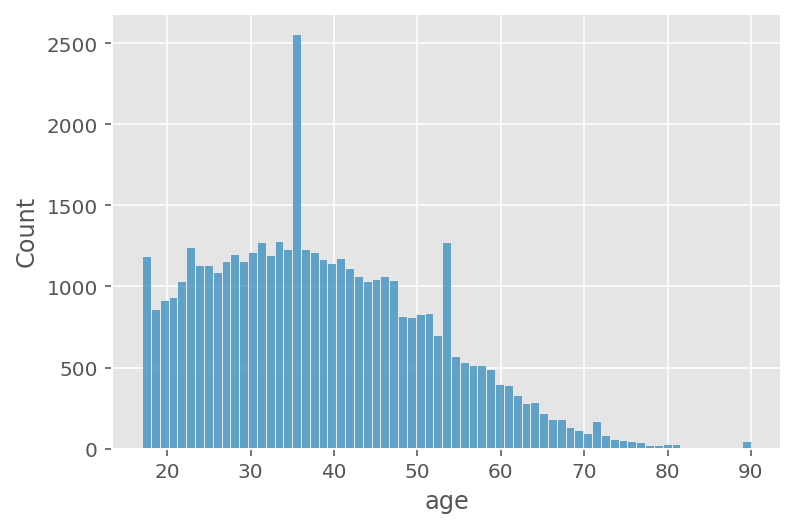

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

import seaborn as sns

sns.histplot(data=df, x="age")

How to "extend" the age histogram into a two-variable plot: We can stratify the histogram by `income`. We can see that younger persons tended to earn less than 50K.

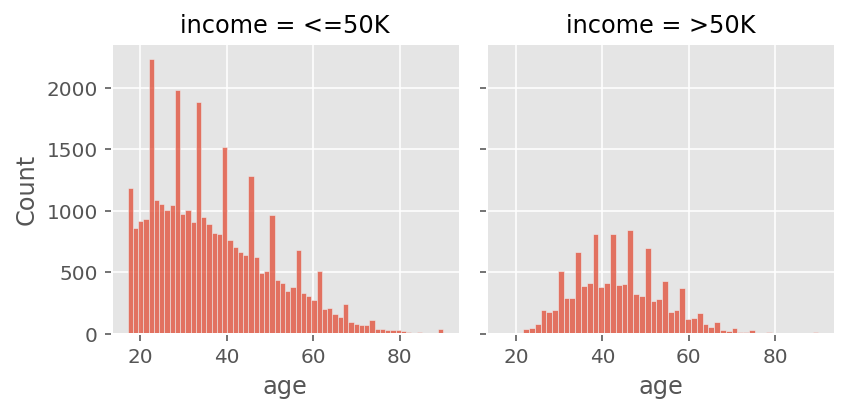

In [48]:
g = sns.FacetGrid(df, col='income')
g.map_dataframe(sns.histplot, x='age')

How to further "extend" the age histogram into a three-variable plot: We can stratify the histogram by `income` by `sex` as following. So, what insight or story can you tell from the visual below?

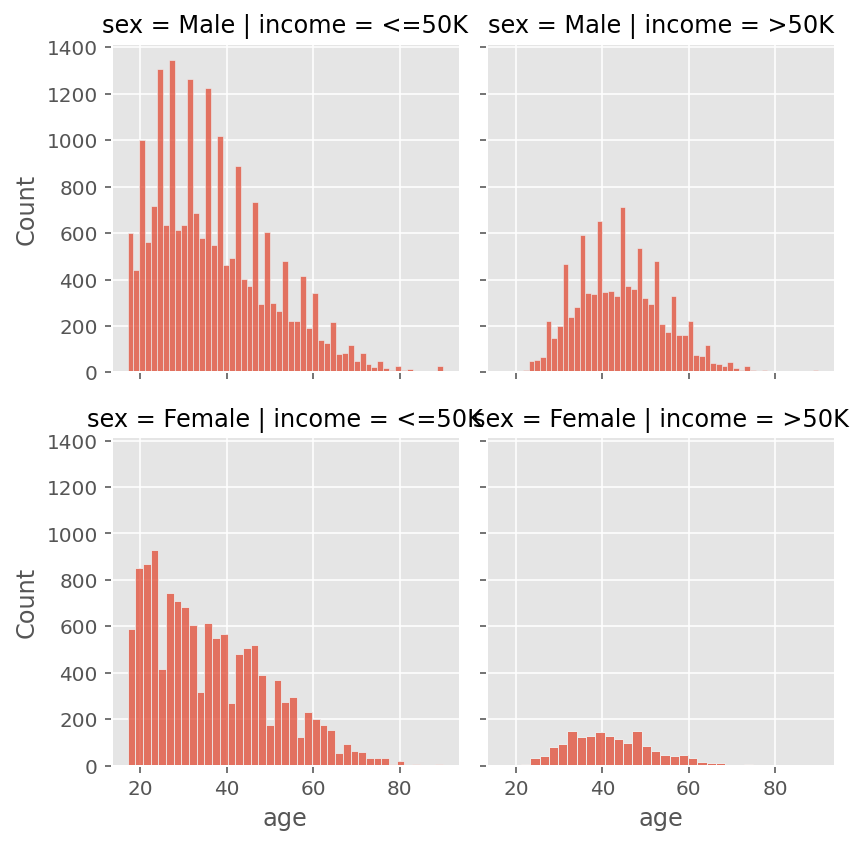

In [49]:
g = sns.FacetGrid(df, col='income', row='sex')
g.map_dataframe(sns.histplot, x='age')

### Further References

For more information on the entire data preprocessing process, please refer to the Data Prep lecture notes (on Chapters 2 and 3) and the [Data Prep tutorial](https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-learning/) on our website.

***
www.featureranking.com